# Chap6 : Decision Trees

#### [Keywords]
- 1) 의사결정트리(Decision Tree)란?
- 2) scikit-learn의 CART 학습알고리즘이란? : 트리의 정규화 및 회귀분석
- 3) 의사결정트리의 한계점

In [13]:
## Setup
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "imag", fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'    

## 0. Decision Tree(의사결정나무)의 개요.
#### 1) 정의 : 의사결정나무란?
- 어떤 항목에 대한 관측값(성별,나이,배우자와 자녀의 수)과 목표값(생존여부)을 연결시켜주는 예측 모델로 사용.[ex) 타이타닉 호 탑승자의 성별, 나이, 배우자와 자녀의 수를 이용해서 생존확률을 구분해 나가는 것]
![](./imag/dt_def.png)

- 통계학과 데이터마이닝, 기계학습, 인공지능에서 쓰는 대표적인 분석방법.
    - 기계학습 중 하나로 특정 항목에 대한 의사 결정 규칙(Decision rule)을 나무 형태로 분류해 나가는 분석 기법
- 주어진 데이터를 분류(Classification)하는 목적으로 사용.
    - 분류함수를 의사결정 규칙으로 이뤄진 나무모양으로 그리는 방법.
- 예측(Prediction)하는데는 사용할 수 없음, 즉 목표 변수가 범주형인 경우 사용
- 목표변수가 수치형인 경우에 사용할 수 없음, 그러나 적용하려면 수치형 변수에서 범주형으로 이산화 한 후 적용하면 됨.
- 분류의 기준을 선택하는 방법, 나무 구조를 만드는 방법, 나무구조를 정리하는 가지치기 방법 등에 따라 다양한 알고리즘이 개발되어 있음




#### 2) 의사결정나무의 목적과 분석
[목적]
- 세분화(Segmentation) : 데이터를 비슷한 특성을 갖는 몇 개의 그룹으로 분할해 그룹별 특성을 발견하는 경우 또는 각 고객이 어떤 집단에 속하는지를 파악하고자 하는 경우 
    - (ex) 시장세분화, 고객세분화
- 분류(Classification) : 관측개체를 여러 예측변수들에 근거해 목표변수의 범주를 몇개의 등급으로 분류하고자 하는 경우
    - ex) 고객을 신용도에 따라 우량/불량으로 분류
- 예측(Prediction) : 자료에서 규칙을 찾아내고 이를 이용해 미래의 사건을 예측하고자 하는 경우
    - ex) 고객속성에 따라서 대출한도액을 예측
- 차원축소 및 변수선택(Data reduction and variable screening) : 매우 많은 수의 예측변수 중에서 목표변수에 큰 영향을 미치는 변수들을 골라내고자 하는 경우
- 교호작용효과의 파악(Interaction effect identification) : 여러 개의 예측변수들을 결합해 목표변수에 작용하는 규칙(교호작용효과)을 파악하고자 하는 경우
- 범주의 병합 또는 연속형 변수의 이산화(Binning) : 범주형 목표변수의 범주를 소수의 몇 개로 병합하거나 연속형 목표변수를 몇 개의 등급으로 이산화 하고자 하는 경우

[분석]
- 분석단계 : 성장단계 -> 가지치기 단계 -> 타당성 평가 단계 -> 해석 및 예측 단계
- 나무의 가지치기 : 너무 큰 나무모형은 자료를 과대적합하고 너무 작은 나무모형은 과소적합 할 위험이 있어 마디에 속한 자료가 일정 수 이하일 경우, 분할을 정지하고 가지치기를 실시
- 불순도에 따른 분할 측도 : 카이제곱 통계량, 지니지수, 엔트로피지수

#### 3) 의사결정나무 알고리즘의 종류.
[기본]
- 분류트리 : 트리모델 중 목표변수가 유한한 수의 값을 가지는 것.
- 회귀트리 : 결정트리 중 목표변수가 연속하는 값, 일반적인 실수를 가지는 것.

[상세]
- 알고리즘들은 기본적인 가지생성 방식은 유사하며 가지를 분리하는 방식(분리에 사용될 변수 및 기준을 선택하는 방식)에서의 약간의 차이를 갖음
![](./imag/dt_variable.png)
![](./imag/dt_table.png)

- 상세설명링크: http://www.birc.co.kr/2017/01/11/%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4decision-tree/

## 1. Training and Visualizing a Decision Tree
- 4장에서 다룬 iris dataset을 DecisionTreeClassifer로 학습

In [72]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [73]:
#### 결정트리를 그림으로 export 해주는 패키지 : export_graphviz, pydotplus
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data = export_graphviz(
                            tree_clf,
                            out_file=None,
                            # out_file=image_path("iris_tree.dot"),

                            feature_names=iris.feature_names[2:],
                            class_names=iris.target_names,
                            rounded=True,
                            filled=True,
                            special_characters=True
                            )
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("./imag/iris_tree2.png") # 1. 그림으로 저장(path는 지정해야됨)
# Image(graph.create_png()) # 2.직접표현

True

#### [참고] 
- 결정트리를 그림으로 export 해주는 패키지 : export_graphviz, pydotplus
    - 설치 : pip install graphviz > 설치 후 이 패키지를 불러와도 오류가 나면 수동설치요망.
    - 수동설치 다운로드 
        - 1) https://graphviz.gitlab.io/download/ 에서 다운로드. 
        - 2) window의 경우 : 설치 후 [환경변수-Path]에 
        C:\Program Files (x86)\Graphviz2.38\bin 를 추가
- 참고링크
    - http://blog.naver.com/PostView.nhn?blogId=taesiri&logNo=220931889780&parentCategoryNo=&categoryNo=71&viewDate=&isShowPopularPosts=true&from=search
    - http://iamaman.tistory.com/1462

##### 위에서 저장된 결정트리 그림을 표현
![](./imag/iris_tree2.png)

- 루트 노드(root node) : 깊이가 0, 가장 상단 노드(petal_length <= 2.45)
- 자식 노드(child node) : 루트 노드에서 분류된 하위 노드들.
- 잎 노드(leaf node) : 더 이상 자식 노드를 가지지 않는 노드.(class=setosa 라고 예측)

#### 불순도(지니계수) 
![](./imag/gini_impurity.png)
- gini : 불순도(impurity) 측정값, 
    - 모든 학습 인스턴스(i)들이 같은 클래스(k)에 속할 시 : gini=0 > 'pure'한 노드다.
- (계산 예시: 깊이 2의 왼쪽노드) : $1 - (0/54)^2 - (49/54)^2 - (5/54)^2 = 0.168$

## 2. Making Predictions

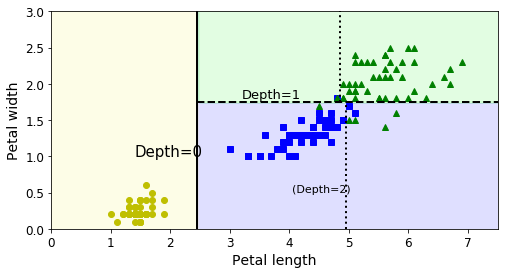

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

# save_fig("decision_tree_decision_boundaries_plot")
plt.show()

- max_depth : 2인경우임, 더 깊게 설정시 추가될것.
- Depth = 0 : root node의 결정경계선(decision boundary)

## 3. Estimate Class Probability
- 인스턴스가 특정 클래스 k에 속할 확률을 측정가능.
- (ex) Petal_Length = 5cm, Petal_width = 1.5cm 인 꽃의 확률 

In [17]:
# 확률
tree_clf.predict_proba([[5,1.5]])
# 예측 클래스(0:setosa, 1: versicolor, 2: verginica)
tree_clf.predict([[5,1.5]]) # 파란 직사각형
# (ex) Petal_Length = 6cm, Petal_width = 1.5cm 인 꽃의 확률  
tree_clf.predict([[6,1.5]]) # 파란 직사각형 : 직사각형 어느부분이나 확률은 동일.

array([[ 0.        ,  0.90740741,  0.09259259]])

array([1])

array([1])

## 4. The CART Training Algorithm
- Classification And Regression Training(CART) : scikit-learn이 학습시키는 의사결정나무알고리즘 방법. 
    - 전체 데이터셋을 갖고 시작하여 두개의 자식노드를 생성하기 위해 모든 예측변수를 사용하여 데이터셋의 부분집함을 쪼갬으로써 의사결정 트리를 생성.
    - feature(class) $k$와 임계값(thereshold) $t_k$를 사용하여 학습 set을 subset으로 분할.(위의 예: petal_lengh의 임계값: 2.45cm)
![](./imag/CART_cost_fuc.png)
- 학습 set > subsets > sub-subset 식의 재귀적 분할.

##### 한글설명 추가
![](./imag/CART_cost_fuc_kor.png)

- Gini Index(지니계수)가 작아지는 방향으로 움직임
- 가장 많이 감소 시키는 변수 = 영향을 많이 미치는 변수 = root node
- 재귀 중지 추가 조건 파라메터 설정 : 의사결정나무의 hyperparameter
- (DecisionTreeClassifier(max_depth=2, random_state=42))
    - min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes

- 최적의 트리를 찾는 것 = NP-Complete 문제!(참고 : http://yoonho.info/19)
- 이는 $O(e^{m})$ 만큼 시간이 필요하기 때문에 작은 학습 set에서도 클래스수가 늘어나면 알고리즘적으로 시간이 오래 걸림!

##### $O(m)$ : Big-O notation(점근표기법)
- Big-O notation(점근표기법) 이란? : https://namu.wiki/w/%EC%A0%90%EA%B7%BC%20%ED%91%9C%EA%B8%B0%EB%B2%95
- Big-O notation(점근표기법)의 의미 : http://www.mydiyworld.net/?p=440 

## 5. Computational Complexity(계산적 복잡성)
- 의사결정나무는 일반적으로 대략적인 균형을 이루고 예측을 하기 위해 루트(root)에서 잎(leaf)로 이동해야함 >  트리 탐색시 $O(log2(m))$개의 노드를 통과해야함 : 이진검색(binary search)
- 이진검색(binary search) : 정렬된 데이터를 검색하는 기술이다. 이는 데이터의 중간 값을 취하여, 원하는 값이 맞는지 비교하는 방식으로 수행한다. 만약에 값을 찾았다면, 성공적으로 종료할 것이고, 찾는 값이 중간을 취한 값보다 클 경우, 큰 값들이 있는 상위 반값의 중간지점의 값을 비교를 시도할 것이다. 마찬가지로 찾는 값이 중간 지점의 값보다 작다면 작은 값들의 반쪽에서 값을 취할 것이다. 이런 방식으로 더이상 중간값을 취할 수 없을 때까지 수행을 반복한다. 
- 이를 $O(log2(m))$ 표시 :
    - 각 노드는 하나의 feature의 값을 확인 > feature의 개수에 상관없이 예측복잡도는 $O(log2(m))$  > 매우 빠름
    - (예시) $O(log(m))$ : 입력 데이터를 10개 처리 > 1초라면, 100개는 2초, 1000개는 3초가 걸릴것 
    - 데이터가 2배가 되도 수행시간이 적게 걸림 > 대용량 데이터를 처리하는데 효율적.

##### BUT
- 총 복잡도 : $O(n*m*log(m))$
    - n : feature개수
    - m : 모든 샘플(데이터)
    - 각 노드의 모든 샘플들에서 모든 feature(or less if max_feature set)을 비교하기때문에 복잡도 증가 > 대규모 학습 set일 경우 속도가 느려짐.

## 6. Gini Impurity or Entropy?(지니계수 or 엔트로피)
- criterion hyperparameter 설정변경 : Gini Impurity > Entropy Impurity
- entrpy = 0 : 완벽히 정렬됨(완벽히 구분) > 학습 set이 단 하나의 class의 인스턴스로 포함될 때
- 아래 : i번째 노드의 Entropy definition
![](./imag/dt_entropy.png)

![](./imag/depth2_node.png)
- (ex: 계산 예시: 깊이 2의 왼쪽노드)
    - Gini Impurity: $1 - (0/54)^2 - (49/54)^2 - (5/54)^2 = 0.168$
    - Entropy Impurity: $-(0/54)*log(0/54)-(49/54)*log(49/54)- (5/54)*log(5/54) = 0.31$
- 차이점
    - 계산속도 : Gini(기본값) > Entropy
    - Gini : 트리의 분기(branch)에서 가장 빈번한 클래스를 고립시키는(isolate) 경향.
    - Entropy : 좀 더 균형잡힌 트리 생성.

## 7. Regularization Hyperparameters
- DecisionTreeClassifier의 결정트리 모양 제한 매개변수.
    - min_samples_split : 노드 분할 전 최소 분리 샘플수
    - min_samples_leaf : 잎 노드에 있어야하는 샘플 최소개수
    - min_weight_fraction_leaf : min_seamples_leaf와 같지만 가중치가 부여된 인스턴스의 총 개수의 부분(fraction)으로 표현.
    - max_leaf_nodes : 최대 잎 노드수
    - max_feature: 각 노드에서 분할을 위해 평가되는 최대 feature수

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.1,
            presort=False, random_state=42, splitter='best')

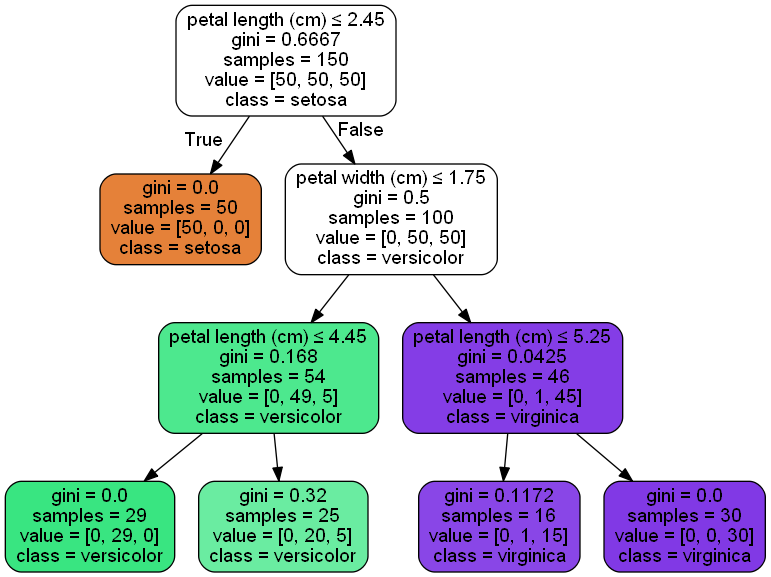

In [55]:
## 다른 하이퍼파라메터 설정
# min_samples_split : 최소 분리 샘플수
# tree_clf_sub1 = DecisionTreeClassifier(min_samples_split=2, random_state=42)
# min_samples_leaf : 최소 잎 노드수
# tree_clf_sub1 = DecisionTreeClassifier(min_samples_leaf=2, random_state=42)
# min_weight_fraction_leaf : 최소 잎노드 가중치
tree_clf_sub1 = DecisionTreeClassifier(min_weight_fraction_leaf=0.1, random_state=42)
# max_leaf_nodes : 최대 잎 노드수
# tree_clf_sub1 = DecisionTreeClassifier(max_leaf_nodes=3, random_state=42)
tree_clf_sub1.fit(X, y)
dot_data1 = export_graphviz(
                            tree_clf_sub1,
                            out_file=None,
                            # out_file=image_path("iris_tree.dot"),
                            feature_names=iris.feature_names[2:],
                            class_names=iris.target_names,
                            rounded=True,
                            filled=True,
                            special_characters=True
                            )
graph = pydotplus.graph_from_dot_data(dot_data1)
Image(graph.create_png()) # 2.직접표현

- min_* 하이퍼매개변수 증가 or max_* 하이퍼 매개변수 감소시 > 모델의 정규화

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

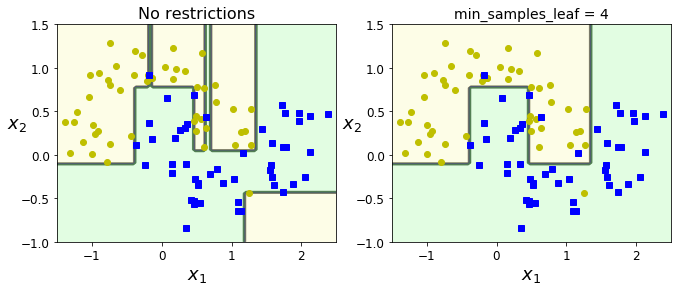

In [57]:
# 5장 moon데이터 set 결정트리
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

# save_fig("min_samples_leaf_plot")
plt.show()

- 매개변수 제한 없을 때(No Restrictions) : overfitting
- min_samples_leaf(잎노드수 최소) = 4 제한: regularization 됨.

## 8. Regression Trees : 회귀트리
- DecisionTreeRegrssion 으로 회귀트리 만듦.
- max_depth=2 제한 : 노이즈가 있는 2차 데이터 set 학습

In [58]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [60]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

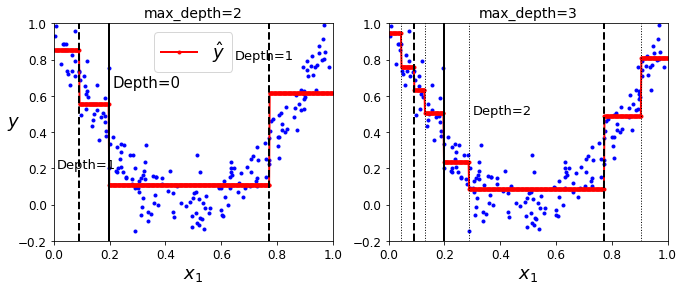

In [62]:

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

# save_fig("tree_regression_plot")
plt.show()

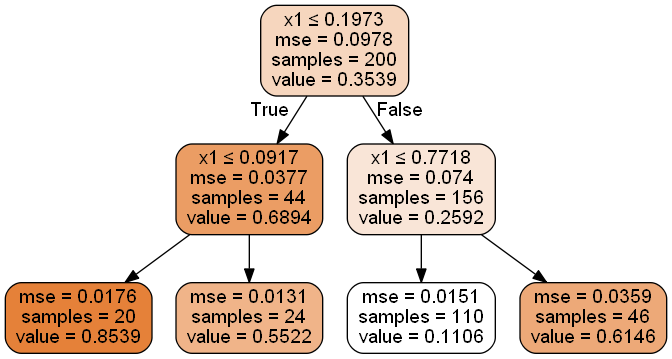

In [64]:
dot_data2 = export_graphviz(
                            tree_reg1,
                            # out_file=image_path("regression_tree.dot"),
                            out_file=None,
                            feature_names=["x1"],
                            rounded=True,
                            filled=True,
                            special_characters=True
                        )
                            
graph = pydotplus.graph_from_dot_data(dot_data2)
Image(graph.create_png()) # 2.직접표현

- 회귀트리의 CART알고리즘 : MSE를 최소화하는 방식으로 학습 set을 분할한다는 점 을 제외하고 기본 의사결정나무와 동일.
![](./imag/CART_cost_fuc_regression.png)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

[0, 1, -0.2, 1.1]

[0, 1, -0.2, 1.1]

Saving figure tree_regression_regularization_plot


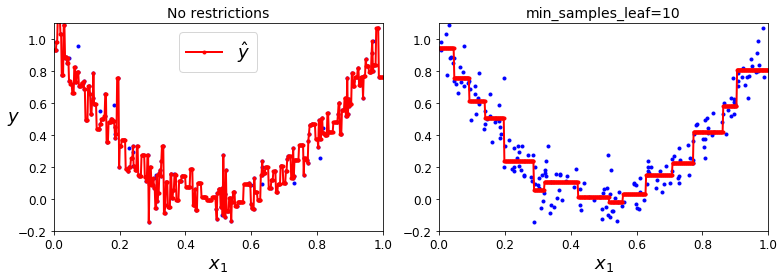

In [66]:
# 회귀트리의 정규화 작업.
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

# save_fig("tree_regression_regularization_plot")
plt.show()

## 9. Instability : Sensitivity to training set details
- 의사결정트리의 불안정성 : 단점.
    - 종속변수가 연속형일 때 쓸 수 없다.
    - 설명변수가 연속형일 때 낮은 예측능력을 보일 수 있다.
    - 자료의 추가 또는 제외에 의하여 나무구조가 바뀔 수 있다.
    - 비선형데이터에는 적합하지 못하다. 

####  set rotation에 매우 민감.
- 모든 분할은 축에 수직적(orthogonal) 결정 경계를 사랑(love)하기 때문.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

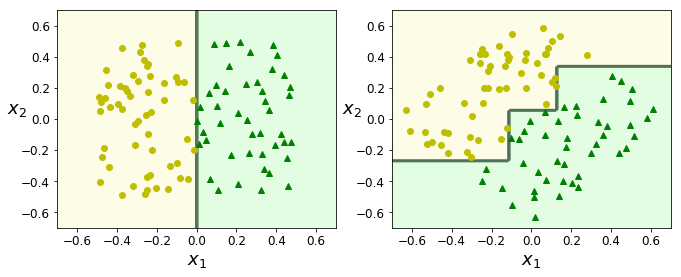

In [70]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4 # 45도로 matrix값을 돌림.
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

# save_fig("sensitivity_to_rotation_plot")
plt.show()

- 45도 회전 후 결정경계가 불안함 > 제한방법 8장의 PCA

#### 학습데이터의 변화에 민감.
- (예시) iris 데이터중 : petal_length=4.8, petal_width=1.8의 versicolor를 제거 후 학습한 모습.

In [75]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[ 4.8,  1.8]])

In [77]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=40, splitter='best')

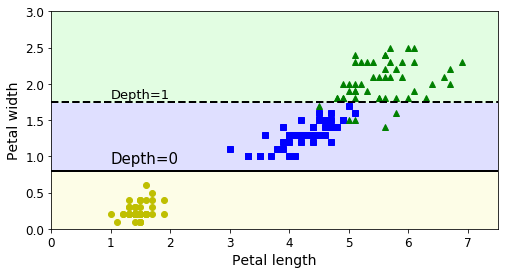

In [79]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

# save_fig("decision_tree_instability_plot")
plt.show()

##### 데이터제거 전 의사결정경계선
![](./imag/dt_original.png)

- scikit-learn에 의해 사용된 훈련 알고리즘이 확률적(stochastic)이므로 모델이 다름.

- 의사결정나무의 장점 
    - 설명력이 높다.
    - 결과에 대한 근거를 나뭇가지 형태로 추적할 수 있다.
    - 빠르고 변수 선택 능력이 있다.
    - 많은 변수들을 대상으로 종속변수에 영향이 높은 변수를 선택 할 수 있다.

##### 추후에는?
- Random Forests : 많은 트리에 대한 예측의 평균으로 불안정성 제한가능한 방법.